In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'ex1data2.txt'
data = pd.read_csv(path, names = ['Size', 'Bedrooms', 'Price'])

In [4]:
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
data = (data - data.mean()) / data.std()# Feature Normalization 特征归一化 类似于 (X - μ) / σ
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [6]:
data.insert(0, 'ones', 1)
data.head()

,ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [26]:
cols = data.shape[1]
x = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]
x = np.matrix(x)
y = np.matrix(y)
theta = np.matrix([0,0,0])

In [29]:
def computeCost(x, y, theta):
    return np.sum(np.power(x * theta.T - y, 2)) / (2 * data.shape[0])

In [30]:
computeCost(x, y, theta)

0.48936170212765967

In [36]:
def GradientDescent(x, y, theta, alpha, num):
    temp = np.matrix([0,0,0])
    cost = np.zeros(num)
    for i in range(num):
        temp = theta - alpha / data.shape[0] * (x * theta.T - y).T * x
        theta = temp
        cost[i] = computeCost(x, y, theta)
        
    return theta, cost

In [38]:
thetaFinal, cost = GradientDescent(x, y, theta, 0.01, 1000)
computeCost(x, y, thetaFinal)

0.13070336960771892

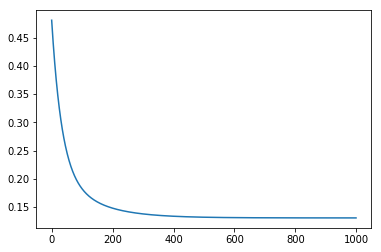

In [43]:
fig, ax = plt.subplots()
ax.plot(np.arange(1000), cost)
plt.show()